<a href="https://colab.research.google.com/github/pao0318/SAPLab/blob/main/SAP_burnout_modelling1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook Description 
This notebook involves the analysis of HackerEarth employee burnout dataset to create a model for predicting the burnout rate of employees in work-from-home condition.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing essential libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
# Importing datasets from drive 
df_train = pd.read_csv('/content/drive/MyDrive/saplab/train.csv')
df_train.head()
print(df_train.shape)

(22750, 9)


In [ ]:
df_train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


## Dataset Description
The following images shows the column description of the dataset.


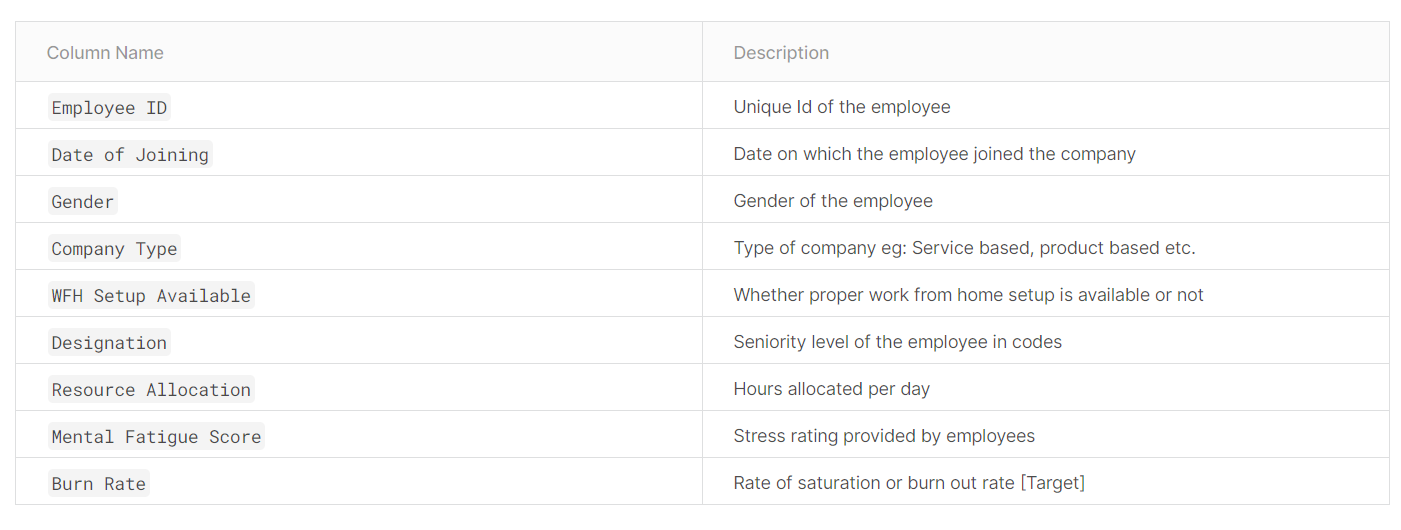

In [ ]:
# Showing column description 
from IPython.display import Image
Image(filename='/content/drive/MyDrive/saplab/columns_description.png')

https://www.kaggle.com/redwankarimsony/hackerearth-employee-burnout-challenge 

Fields which are going to be automatically filled for a user:
  1. Employee ID

Fields which are going to be entered by the user:
  1. Date of Joining 
  2. Gender
  3. Company Type
  4. WFH setup available
  5. Resource Allocation
  6. Designation
  7. Mental Fatigue Score(may be evaluated using other means out of the scope of modelling)

In [ ]:
# Seeing dataset details 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [ ]:
# Seeing null values
df_train.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

There are null values in the fields 'Resource Allocation', 'Mental Fatigue Score' and 'Burn Rate'.

After EDA, the filling of null values will be decided.

In [ ]:
# Seeing statistical details 
df_train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


Designation and resource allocation(provided in hours) are categorical features, hence they need to be handles as such, otherwise only mental fatigue score the target, burn rate are only numeric fields.

## EDA


In [ ]:
# Plotting Years in company with burnout rate
df_train['Date of Joining']

0        2008-09-30
1        2008-11-30
2        2008-03-10
3        2008-11-03
4        2008-07-24
            ...    
22745    2008-12-30
22746    2008-01-19
22747    2008-11-05
22748    2008-01-10
22749    2008-01-06
Name: Date of Joining, Length: 22750, dtype: object

In [ ]:
pd.to_datetime(df_train['Date of Joining'])

0       2008-09-30
1       2008-11-30
2       2008-03-10
3       2008-11-03
4       2008-07-24
           ...    
22745   2008-12-30
22746   2008-01-19
22747   2008-11-05
22748   2008-01-10
22749   2008-01-06
Name: Date of Joining, Length: 22750, dtype: datetime64[ns]

In [ ]:
df_train['Date of Joining'] = pd.to_datetime(df_train['Date of Joining'])

In [ ]:
now = pd.to_datetime('now')
now

Timestamp('2021-04-15 04:09:27.155949')

In [ ]:
df_train['Experience'] = round((now - df_train['Date of Joining']).dt.total_seconds() / (60*60*24*365.25), 1)

In [ ]:
df_train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Experience
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,12.5
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,12.4
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49,13.1
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,12.4
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,12.7


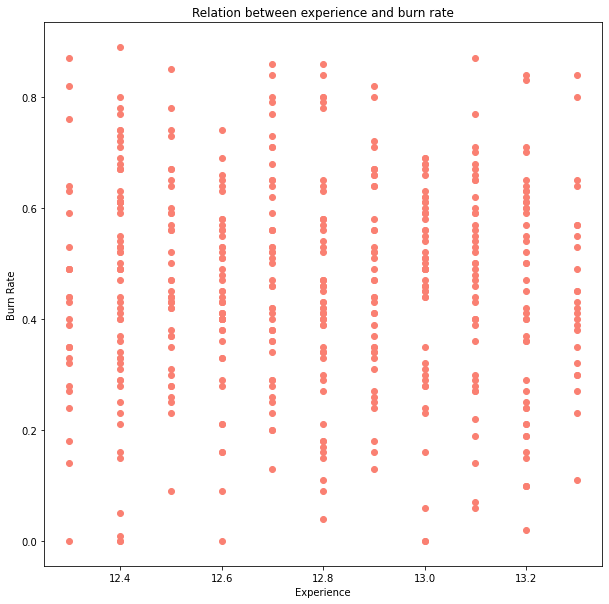

In [ ]:
# Plotting experience with burn rate 
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(df_train['Experience'].sample(frac=1, random_state=42).iloc[:500], 
           df_train['Burn Rate'].sample(frac=1, random_state=42).iloc[:500],
           color = 'salmon')
ax.set(title = 'Relation between experience and burn rate',
       xlabel = 'Experience',
       ylabel = 'Burn Rate');

The plot shows that the burn rate usually lies between 0.2 and 0.8 irrespective of experience. Also, burnout rate increases a bit between 12.6 - 13.0 years of experience, not going below 0.2 for this group.

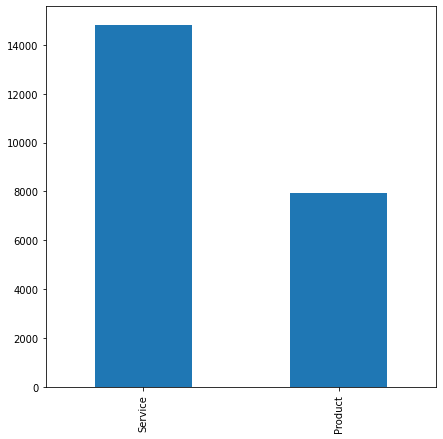

In [ ]:
# Distribution of company type 
plt.figure(figsize=(7,7))
df_train['Company Type'].value_counts().plot.bar()
plt.show()

An overwhelming number of employees most work in service sector, rather than in product sector. This will give us more clarity on its impact in burn rate.

In [ ]:
df_train['Experience'][df_train['Company Type']=='Service']

0        12.5
1        12.4
3        12.4
4        12.7
6        13.3
         ... 
22738    12.3
22739    13.2
22745    12.3
22747    12.4
22748    13.3
Name: Experience, Length: 14833, dtype: float64

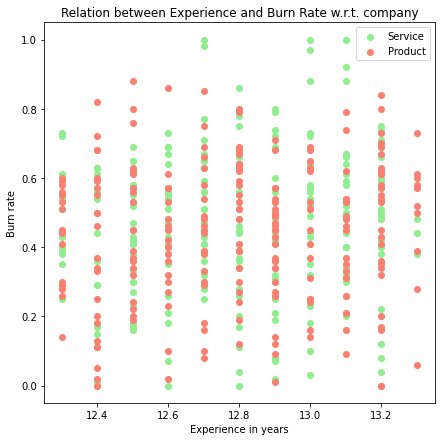

In [ ]:
# Burn rate and experience w.r.t. company type
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df_train['Experience'][df_train['Company Type']=='Service'].sample(frac=1, random_state=42).iloc[:250],
           df_train['Burn Rate'][df_train['Company Type']=='Service'].sample(frac=1, random_state=42).iloc[:250],
           color='lightgreen', label = 'Service')
ax.scatter(df_train['Experience'][df_train['Company Type']=='Product'].sample(frac=1, random_state=42).iloc[:250],
           df_train['Burn Rate'][df_train['Company Type']=='Product'].sample(frac=1, random_state=42).iloc[:250],
           color='salmon', label = 'Product')
ax.set(title = 'Relation between Experience and Burn Rate w.r.t. company',
       xlabel = 'Experience in years',
       ylabel = 'Burn rate')
ax.legend();

The plot shows that people employed in the service sector and with more experience are more vulnerable to burnout. Also, the product sector inhabits the lower burnout region densely.

This shows that service sector employees are more prone to burnout.

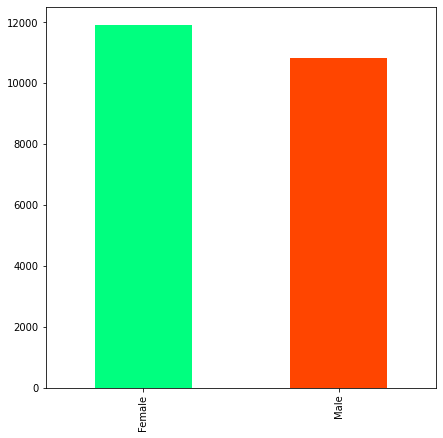

In [ ]:
# Gender distribution 
plt.figure(figsize=(7,7))
df_train['Gender'].value_counts().plot.bar(color=['springgreen', 'orangered'])
plt.show()

The plot shows that there are slightly more women than men in the workplace, let's try to get a more deep insight on how gender affects burn rate.

<Figure size 504x504 with 0 Axes>

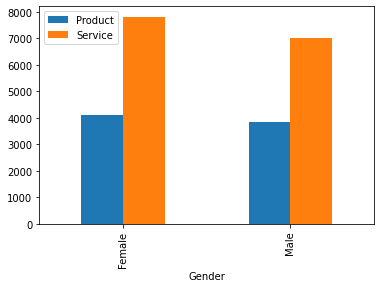

In [ ]:
# Making a cross distribution of gender and company type
plt.figure(figsize=(7,7))
pd.crosstab(df_train['Gender'], df_train['Company Type']).plot.bar()
plt.legend(loc='upper left')
plt.show()

The plot shows that an almost same ratio of male and female employees are split between service and ratio.

<Figure size 504x504 with 0 Axes>

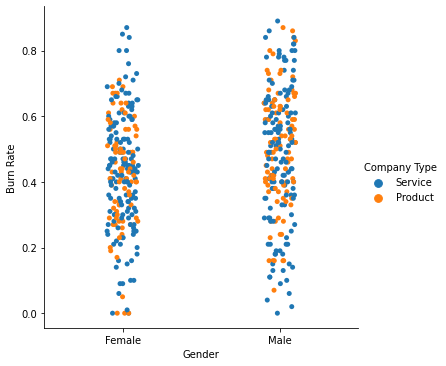

In [ ]:
# Using seaborn for plotting categorical plots 
import seaborn as sns
small_df = df_train.sample(500, random_state=42)
plt.figure(figsize=(7,7))
sns.catplot(x='Gender', y='Burn Rate', hue='Company Type', data=small_df)
plt.show()

The plot shows that among the men in product sector the burn rate is higher, while the burn rate being clearly high in service sector employees.

In [ ]:
 df_train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Experience
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,12.5
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,12.4
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49,13.1
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,12.4
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,12.7


<Figure size 504x504 with 0 Axes>

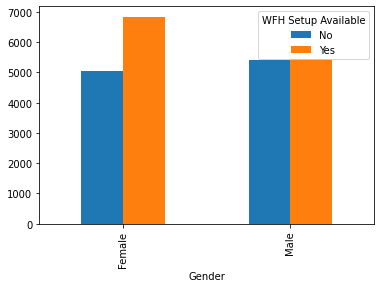

In [ ]:
# Plotting wfh setup and gender 
plt.figure(figsize=(7,7))
pd.crosstab(df_train['Gender'], df_train['WFH Setup Available']).plot.bar()
plt.show()

More females have work-from-home setup arranged whereas an equal number of males have and don't have work-from-home setup.

<Figure size 504x504 with 0 Axes>

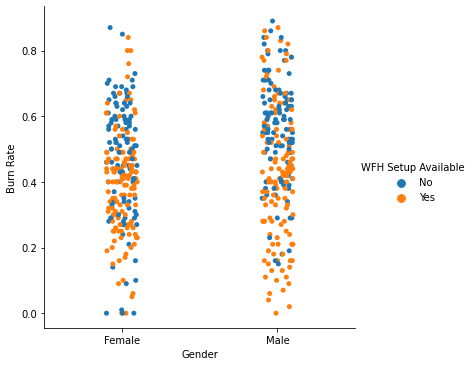

In [ ]:
small_df = df_train.sample(500, random_state=42)
plt.figure(figsize=(7,7))
sns.catplot(x='Gender', y='Burn Rate', hue='WFH Setup Available', data=small_df)
plt.show()

This is clear that employees who don't have work from home setup available are more prone to burn out.

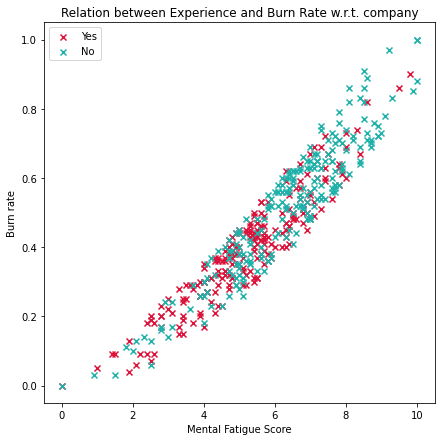

In [ ]:
# Plotting mental fatigue score with burn rate 
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df_train['Mental Fatigue Score'][df_train['WFH Setup Available']=='Yes'].sample(frac=1, random_state=42).iloc[:250],
           df_train['Burn Rate'][df_train['WFH Setup Available']=='Yes'].sample(frac=1, random_state=42).iloc[:250],
           color = 'crimson', label='Yes', marker='x')
ax.scatter(df_train['Mental Fatigue Score'][df_train['WFH Setup Available']=='No'].sample(frac=1, random_state=42).iloc[:250],
           df_train['Burn Rate'][df_train['WFH Setup Available']=='No'].sample(frac=1, random_state=42).iloc[:250],
           color = 'lightseagreen', label='No', marker='x')
ax.set(title = 'Relation between Experience and Burn Rate w.r.t. company',
       xlabel = 'Mental Fatigue Score',
       ylabel = 'Burn rate')
ax.legend();

This shows that mental fatigue score is directly proportional to burn rate and those who don't have wfh setup have higer mental fatigue score and higher burn rate.

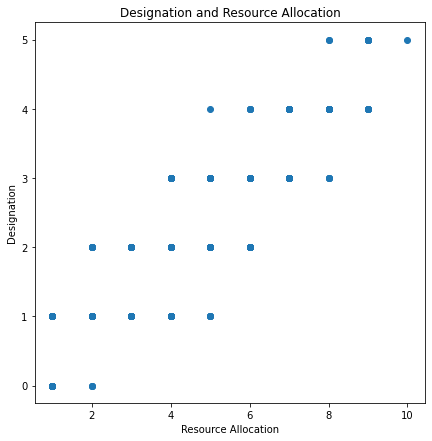

In [ ]:
# Plotting wfh designation and resource allocation
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df_train['Resource Allocation'].sample(frac=1, random_state=42).iloc[:500],
           df_train['Designation'].sample(frac=1, random_state=42).iloc[:500])
ax.set(title='Designation and Resource Allocation',
       xlabel='Resource Allocation',
       ylabel='Designation');

The plot shows that higher the designation, higher are the hours allocated per day.

<Figure size 504x504 with 0 Axes>

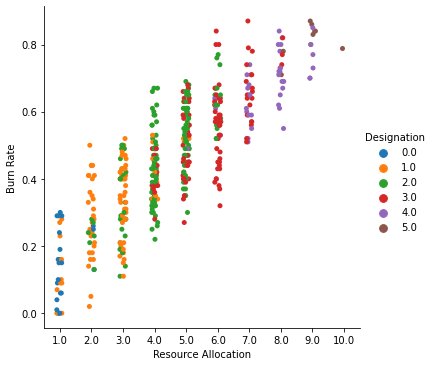

In [ ]:
# Plot showing relation of resource allocation and burn rate w.r.t. designation
plt.figure(figsize=(7,7))
sns.catplot(x='Resource Allocation', y='Burn Rate', hue='Designation', data=small_df)
plt.show()

The plot shows that employees who have higher positions and give more time on their job are suffering from significantly higher burn rates.

<Figure size 576x576 with 0 Axes>

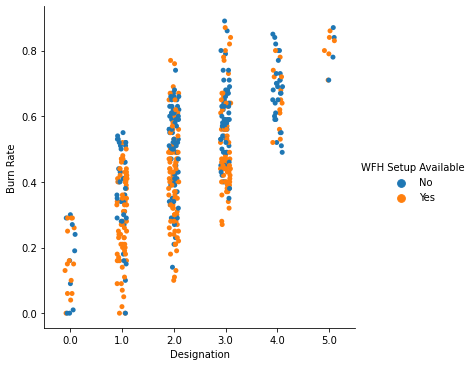

In [ ]:
# Plotting mental fatigue score with burn rate 
plt.figure(figsize=(8,8))
sns.catplot(x='Designation', y='Burn Rate', hue='WFH Setup Available', data = small_df)
plt.show();

It is seen in the plot that those who don't have WHF setup available in every designation level are more prone to burn out.

Now, the EDA part is over. Let's summarize by writing some points about the dataset:


1.   Irrespective of gender, employees in service sector are prone to higher burn rates.
2.   Employees with higher mental fatigue scores are having proportinally higher burn rates.
3.   Employees at higher designation allocate more resources and hence have higher burn rate.
4.   At every level of designation and resource allocation, employees who don't have WFH setup available are suffering from higher burn rates.

Let's see the correlation matrix to see correlations between fields.

In [ ]:
# Plotting correlation matrix
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Experience
Designation,1.000000,0.878459,0.690983,0.737556,0.001261
Resource Allocation,0.878459,1.000000,0.799662,0.856278,0.000471
Mental Fatigue Score,0.690983,0.799662,1.000000,0.944546,-0.003545
Burn Rate,0.737556,0.856278,0.944546,1.000000,0.001015
Experience,0.001261,0.000471,-0.003545,0.001015,1.000000


## Modelling 
Now, its time to start preprocessing and creating a prediction model pipeline.

In [ ]:
# Shape of dataframe
print(df_train.shape)
print(df_train.columns)

(22750, 10)
Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate', 'Experience'],
      dtype='object')


In [ ]:
# Columns to be removed, 'Employee id', 'Date of joining' and 'Experience'
df_train.drop(['Employee ID', 'Date of Joining', 'Experience'], axis=1, inplace=True)

In [ ]:
df_train.shape

(22750, 7)

In [ ]:
# Filling null values 
df_train.isna().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

Since knowing the burn rate is very important, there is not point in having rows which don't have burn rate.

In [ ]:
df_train['Resource Allocation'].median()

4.0

In [ ]:
# Filling null values in 'Resource Allocation' and 'Mental Fatigue Score'
df_train['Resource Allocation'].fillna(value=df_train['Resource Allocation'].median(), inplace=True)

In [ ]:
df_train.isna().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation        0
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

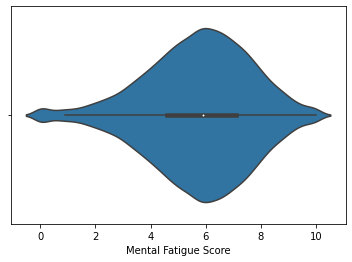

In [ ]:
sns.violinplot(x=df_train['Mental Fatigue Score'])

In [ ]:
df_train.isna().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation        0
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
# Dropping rows with no burn rate 
df_train.dropna(inplace=True)

In [ ]:
df_train.shape

(19681, 7)

In [ ]:
# Label encoding categorical features 
cat_features = [x for x in df_train.columns if df_train[x].dtype=='object']

In [ ]:
cat_features

['Gender', 'Company Type', 'WFH Setup Available']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for cat in cat_features:
  le = LabelEncoder()
  df_train[cat] = le.fit_transform(df_train[cat])

In [ ]:
df_train.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2.0,3.0,3.8,0.16
1,1,1,1,1.0,2.0,5.0,0.36
2,0,0,1,2.0,4.0,5.8,0.49
3,1,1,1,1.0,1.0,2.6,0.20
4,0,1,0,3.0,7.0,6.9,0.52


In [ ]:
# Splitting data into train and test split 
X = df_train.drop('Burn Rate', axis=1)
y = df_train['Burn Rate']

from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, 
                                                              test_size=0.2,
                                                              random_state=42)

In [ ]:
X_train_full.shape, X_test.shape

((15744, 6), (3937, 6))

In [ ]:
# Splitting into validation set 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
                                                      test_size=0.25,
                                                      random_state=42)

In [ ]:
X_train.shape, X_valid.shape

((11808, 6), (3936, 6))

In [ ]:
# Using Linear Regression on the dataset 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train.values, y_train.values)
lr.score(X_valid, y_valid)

0.9130281661795171

In [ ]:
# Finding other metrics on the model 
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = lr.predict(X_valid)
print(mean_absolute_error(y_valid, y_pred))

0.047775297276039616


In [ ]:
print(mean_squared_error(y_valid, y_pred))

0.0033849121235445256


In [ ]:
# Making a function to calculate metrics
def metrics(model, X, y_true):
  """
  Function to calculate accuracy, mean squared error and mean absolute error

  Parameters
  -----------
  model - model trained with training data
  y_true - true label

  Return 
  -----------
  Dictionary storing the metrics 
  """
  y_pred = model.predict(X)
  mae = mean_absolute_error(y_true, y_pred)
  acc = model.score(X, y_true)
  mse = mean_squared_error(y_true, y_pred)

  return {'Accuracy( in %)': round(acc*100, 4),
          'Mean Absolute Error': mae,
          'Mean Squared Error': mse}

In [ ]:
metrics(lr, X_valid, y_valid)

{'Accuracy( in %)': 91.3028,
 'Mean Absolute Error': 0.047775297276039616,
 'Mean Squared Error': 0.0033849121235445256}

In [ ]:
# Using lasso regression, which gives more importance to some features
from sklearn.linear_model import Lasso 
las = Lasso()
las.fit(X_train, y_train)
metrics(las, X_valid, y_valid)

{'Accuracy( in %)': -0.007,
 'Mean Absolute Error': 0.15864330645338973,
 'Mean Squared Error': 0.03892235212358899}

In [ ]:
# Using ridge regression 
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train, y_train)
metrics(rid, X_valid, y_valid)

{'Accuracy( in %)': 91.3028,
 'Mean Absolute Error': 0.047774964202885774,
 'Mean Squared Error': 0.0033849170417458827}

In [ ]:
# Using random forest, lol 
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
metrics(forest, X_valid, y_valid)

{'Accuracy( in %)': 90.7926,
 'Mean Absolute Error': 0.0473779631063071,
 'Mean Squared Error': 0.0035834903413420422}

#Implementing some more models

In [ ]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
n1 = KNeighborsRegressor(n_neighbors=2)
n1.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [ ]:
metrics(n1, X_valid, y_valid)

{'Accuracy( in %)': 89.1952,
 'Mean Absolute Error': 0.050910823170731714,
 'Mean Squared Error': 0.004205189278455285}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 =KNeighborsRegressor()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 21
Best p: 2
Best n_neighbors: 29


In [ ]:
n2 = KNeighborsRegressor(n_neighbors=29,p=2,leaf_size=21)
n2.fit(X_train, y_train)
metrics(n2, X_valid, y_valid)

{'Accuracy( in %)': 91.9287,
 'Mean Absolute Error': 0.04521613050182226,
 'Mean Squared Error': 0.003141309374486432}

# Deep NeuralNets

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cs = MinMaxScaler()
X_train = cs.fit_transform(X_train)
X_test = cs.transform(X_test)

In [ ]:
model=Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=None, epochs=10, validation_data=(X_valid,y_valid))

Epoch 1/10
369/369 [==============================] - 2s 2ms/step - loss: 0.0708 - accuracy: 0.0139 - val_loss: 6.6311 - val_accuracy: 0.0107
Epoch 2/10
369/369 [==============================] - 1s 2ms/step - loss: 0.0050 - accuracy: 0.0167 - val_loss: 13.5572 - val_accuracy: 0.0132
Epoch 3/10
369/369 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 0.0157 - val_loss: 16.0961 - val_accuracy: 0.0142
Epoch 4/10
369/369 [==============================] - 1s 2ms/step - loss: 0.0035 - accuracy: 0.0163 - val_loss: 18.5149 - val_accuracy: 0.0142
Epoch 5/10
369/369 [==============================] - 1s 2ms/step - loss: 0.0034 - accuracy: 0.0142 - val_loss: 19.6575 - val_accuracy: 0.0142
Epoch 6/10
369/369 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 0.0167 - val_loss: 20.2252 - val_accuracy: 0.0142
Epoch 7/10
369/369 [==============================] - 1s 1ms/step - loss: 0.0033 - accuracy: 0.0166 - val_loss: 20.0133 - val_accuracy: 0.0145


In [ ]:
scores = model.evaluate(X_valid, y_valid, verbose=0)

In [ ]:
cvscores = []
print("%s: %.2f%%" % (model_ann.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)

accuracy: 1.45%


KNN Regressor is best among all models